## Name - Aryan Yadav

In [1]:
#Import required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image
%matplotlib inline

## Get Data

### This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

### The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width in centimetres.

In [2]:
iris=load_iris()
X=iris.data[:,:]  # returns a 2-D array containing features of data samples
y=iris.target

In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df=pd.DataFrame(iris['data'],columns=["Sepal Length","Sepal Width","Petal Length","Petal Width"])
df['Species']=iris['target']
df['Species']=df['Species'].apply(lambda x: iris['target_names'][x]) # changing numbers to names of each class

df.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis

In [5]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

## Data Visualisation

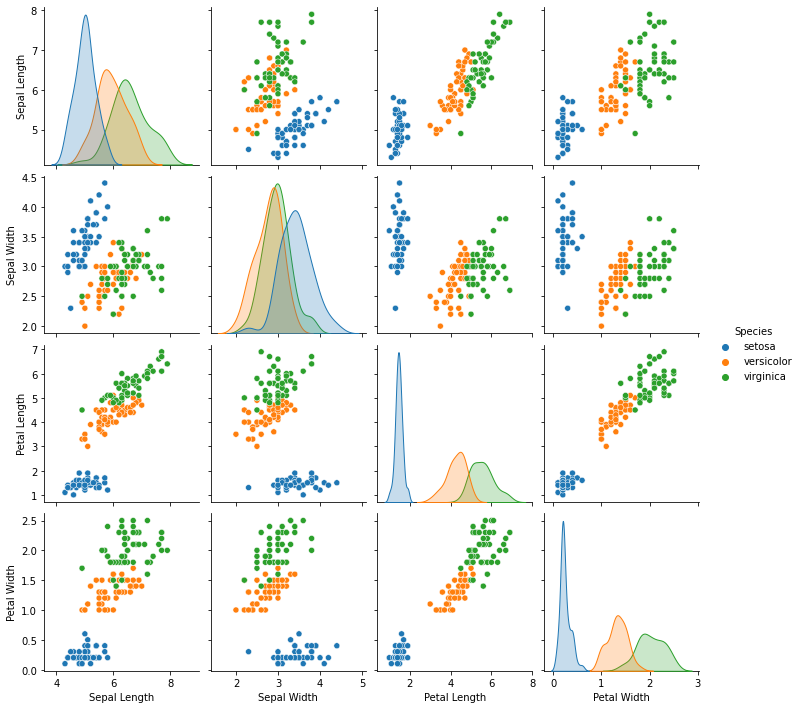

In [7]:
sns.pairplot(data=df,hue='Species')

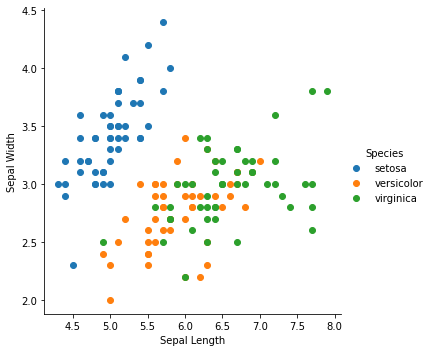

In [8]:
sns.FacetGrid(df,hue='Species',height=5,aspect=1).map(plt.scatter,'Sepal Length','Sepal Width').add_legend()

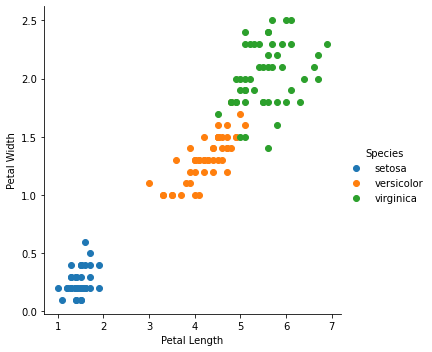

In [9]:
sns.FacetGrid(df,hue='Species',height=5,aspect=1).map(plt.scatter,'Petal Length','Petal Width').add_legend()

## Model Training

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state = 10)

In [11]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred=model.predict(X_test)

## Comparing actual and predicted flower classification

In [13]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [14]:
df1.head(10)

,Actual,Predicted
0,1,1
1,2,2
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1


## Visualizing predicted data

<AxesSubplot:>

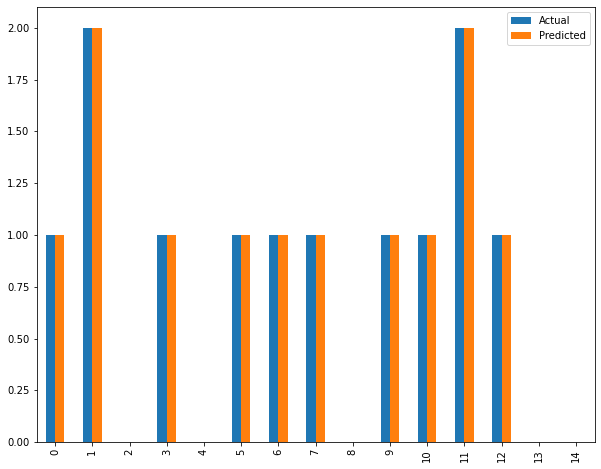

In [15]:
df1.plot(kind='bar',figsize=(10,8))

In [16]:
from sklearn.tree import plot_tree

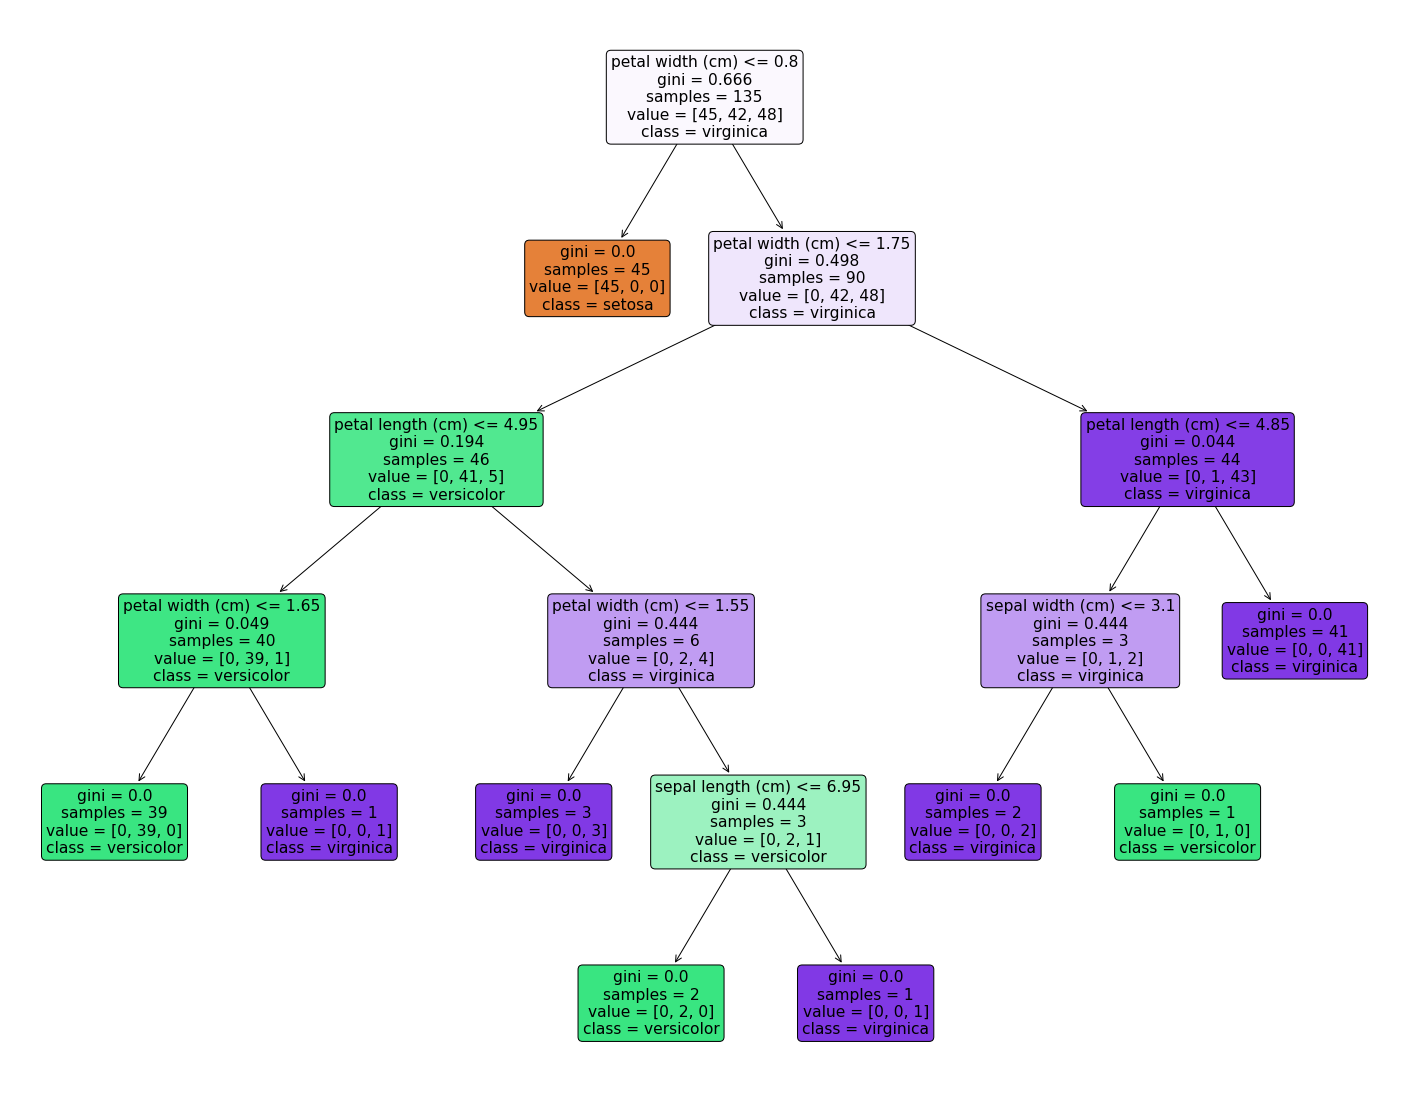

In [17]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, 
            feature_names=iris.feature_names,  
            class_names=iris.target_names,
            filled=True,rounded = True,) # output type -> list

## Sample test case run

In [18]:
sample=[[1,1,2,3]]

In [19]:
model.predict(sample)

array([2])

## Model Accuracy

In [20]:
import sklearn.metrics as sm

In [21]:
sm.accuracy_score(y_test,y_pred) # calculates the accuracy

1.0